<a href="https://colab.research.google.com/github/sagunkayastha/CAI_Workshop/blob/main/Workshop_3/msnist_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard Libraries
import os
import numpy as np
import pandas as pd
import random as rn

# Visualization libraries

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({"axes.facecolor": ".95"})

# Modeling and Machine Learning
from IPython.display import Image
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz


# Seed for reproducability
seed = 1234
np.random.seed(seed)
rn.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [2]:
!wget https://raw.githubusercontent.com/sagunkayastha/CAI_Workshop/main/Workshop_3/Inputs/test.csv
!wget https://raw.githubusercontent.com/sagunkayastha/CAI_Workshop/main/Workshop_3/Inputs/train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Specify Paths for easy dataloading

TRAIN_PATH = 'Inputs/train.csv'
TEST_PATH = 'Inputs/test.csv'

# Load in training and testing data
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
concat_df = pd.concat([train_df, test_df])


In [4]:
def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    """
        Calculates the accuracy score between labels and predictions.

        :param y_true: The true labels of the data
        :param y_pred: The predictions for the data

        :return: a floating point number denoting the accuracy
    """
    return round(accuracy_score(y_true, y_pred) * 100, 2)

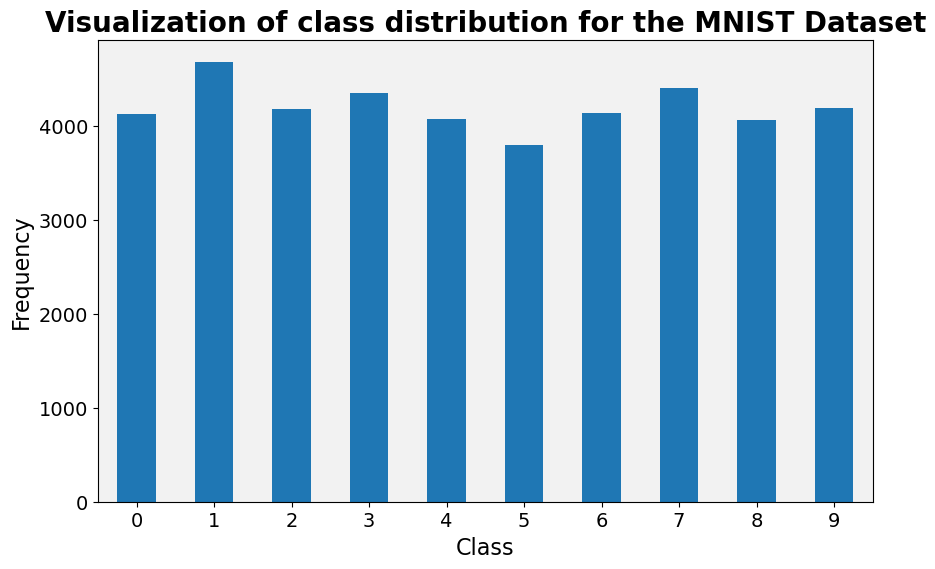

In [5]:
# Visualize target distribution
train_df['label'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Visualization of class distribution for the MNIST Dataset', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16);

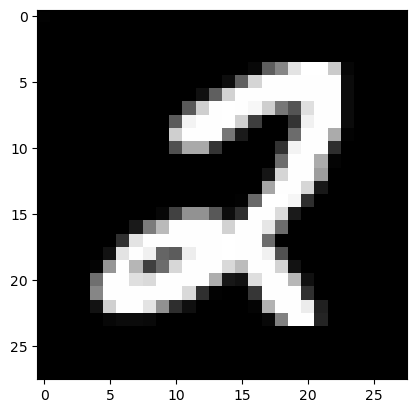

In [6]:
plt.imshow(train_df.loc[np.random.randint(1000)][:-1].values.reshape(28,28), cmap='gray')

In [7]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Get all pixel features
features = [col for col in train_df.columns if col.startswith('pixel')]
# Split up training to for validation
X_train, X_val, y_train, y_val = train_test_split(train_df[features],
                                                  train_df['label'],
                                                  test_size=0.25,
                                                  random_state=seed)

In [9]:
# Train baseline decision tree model
clf = DecisionTreeClassifier(max_depth=10, random_state=seed)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1234)

In [10]:
# Evaluate the baseline model
train_preds_baseline = clf.predict(X_train)
val_preds_baseline = clf.predict(X_val)
acc_baseline_train = acc(train_preds_baseline, y_train)
acc_baseline_val = acc(val_preds_baseline, y_val)
print(f'Training accuracy for our baseline (using all pixel features): {acc_baseline_train}%')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_baseline_val}%')

Training accuracy for our baseline (using all pixel features): 90.86%
Validation accuracy for our baseline (using all pixel features): 84.58%


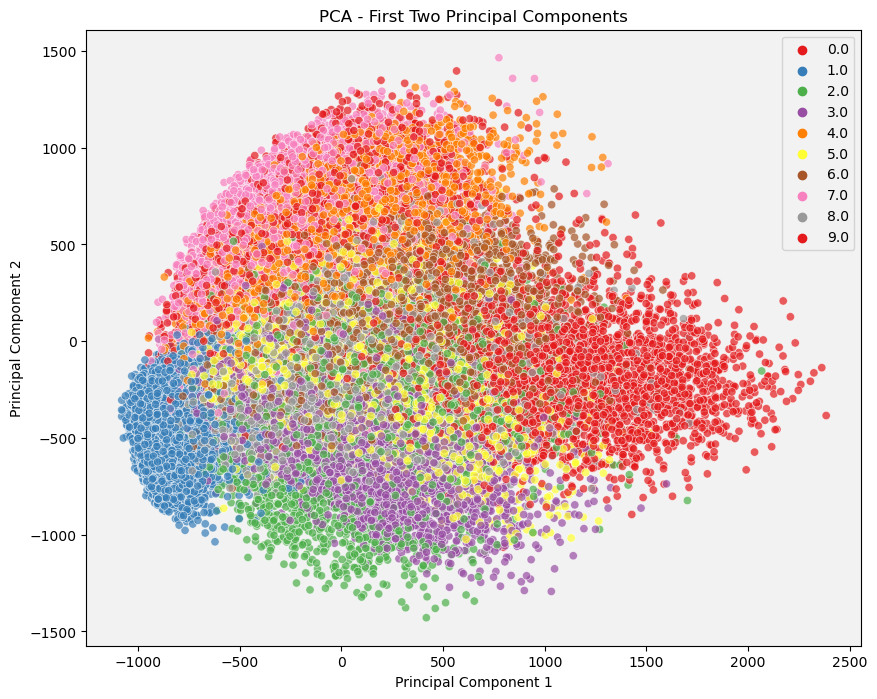

In [11]:
from sklearn.decomposition import PCA


pca = PCA(n_components=50).fit(concat_df[features])
pca_result = pca.transform(concat_df[features])


# Create a DataFrame with the PCA results
# If you have labels for each point, you can add them to the DataFrame for color coding
pca_df = pd.DataFrame(data=pca_result[:, 0:2], columns=['PC1', 'PC2'])
pca_df['label'] = concat_df['label'].values

# Visualize the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette="Set1", alpha=0.7)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



In [12]:
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {variance:.2%} of the variance")
    if i==5:
        break

Principal Component 1: 9.75% of the variance
Principal Component 2: 7.16% of the variance
Principal Component 3: 6.15% of the variance
Principal Component 4: 5.40% of the variance
Principal Component 5: 4.89% of the variance
Principal Component 6: 4.31% of the variance


In [13]:
pd.DataFrame(pca_result)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-675.625509,-682.915808,186.498640,127.289953,-78.365677,488.125117,-692.041655,82.896481,327.166953,203.119568,...,89.916267,42.339701,24.848785,-56.461483,-187.922507,87.212839,-56.175960,-57.084461,-77.312326,23.152159
1,1690.625135,-402.068266,-488.585115,346.731780,-453.005179,737.156898,662.036984,-181.674905,-4.001588,67.466851,...,9.227683,19.112996,13.260926,-60.514637,-111.636192,-3.213819,-7.156432,-144.828120,132.614575,-25.400121
2,-890.131113,-275.559563,79.442720,72.924640,-471.184005,-334.469890,438.114151,-297.464087,-196.553054,-20.046389,...,142.169053,40.555311,84.539392,110.084757,43.112625,123.927686,3.995413,-3.810624,-62.774444,-29.613195
3,-158.531459,302.925905,-66.531553,766.136173,-425.946836,150.842902,-299.858993,276.099877,-57.491297,-286.775435,...,-82.347309,111.543798,84.646546,176.173535,254.485340,182.793309,203.915671,107.678911,-85.623087,30.062733
4,1908.674338,-492.370459,-525.761544,203.054935,-663.649909,990.467203,572.753923,-256.950734,127.437184,176.518498,...,129.203914,-61.555809,43.065528,-59.148476,-95.413660,71.430020,23.127641,-25.082231,0.062562,100.510683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,150.716815,754.841972,-826.791802,317.948689,414.338462,32.439715,-225.624062,147.554223,185.206721,230.178413,...,63.744554,-95.673591,32.314767,11.156561,92.828430,176.368134,-2.070315,-148.625126,92.408228,-17.356697
69996,-270.113873,588.780615,-527.941023,181.239818,-498.348184,-2.427708,-190.323696,545.715745,-1.625061,238.958791,...,189.469394,-84.524646,185.507895,-26.914963,20.170366,-27.942937,-3.466253,7.420337,56.219300,-45.074186
69997,-138.405877,-644.818778,-880.688806,-515.112543,126.347049,45.376450,-114.576691,443.282342,-172.311417,38.869219,...,118.074182,54.287358,-125.359753,-38.316927,66.090015,-27.048072,6.462736,91.546315,15.595097,137.865491
69998,-49.432768,578.108995,-323.990494,-373.091156,432.949150,-594.428941,-371.441276,287.355228,452.418054,253.467764,...,66.692049,105.840481,14.877541,-35.409783,-143.855249,121.900314,58.739409,-76.454552,32.864707,47.789831


In [14]:

# Split up the PCA results in training and testing data
pca_cols = [f'component_{i+1}' for i in range(50)]
pca_train = pd.DataFrame(pca_result[:len(train_df)], columns=pca_cols)
pca_test = pd.DataFrame(pca_result[len(train_df):], columns=pca_cols)

# Perform another split for t-sne feature validation
X_train, X_val, y_train, y_val = train_test_split(pca_train,
                                                  train_df['label'],
                                                  test_size=0.25,
                                                  random_state=seed)

# Train model with PCA features
clf = DecisionTreeClassifier(max_depth=10, random_state=seed)
clf.fit(X_train, y_train)

# Evaluate model with the 50 PCA features and compare to the baseline model
train_preds = clf.predict(X_train)
val_preds = clf.predict(X_val)
acc_pca_train = acc(train_preds, y_train)
acc_pca_val = acc(val_preds, y_val)
print(f'Training accuracy with PCA features (50 components): {acc_pca_train}%')
print(f'Validation accuracy with PCA features (50 components): {acc_pca_val}%')
# Check out how it performed compared to the baseline
acc_diff = round(acc_pca_val - acc_baseline_val, 2)
print(f'\nThis is a difference of {acc_diff}% in validation accuracy compared to the baseline.')

Training accuracy with PCA features (50 components): 83.57%
Validation accuracy with PCA features (50 components): 78.73%

This is a difference of -5.85% in validation accuracy compared to the baseline.


In [15]:
pca_result.shape

(70000, 50)

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


tsne = TSNE()
transformed = tsne.fit_transform(pca_result)

In [17]:
transformed.shape

(70000, 2)

In [18]:
# Split up the t-SNE results in training and testing data
tsne_train = pd.DataFrame(transformed[:len(train_df)], columns=['component1', 'component2'])
tsne_test = pd.DataFrame(transformed[len(train_df):], columns=['component1', 'component2'])

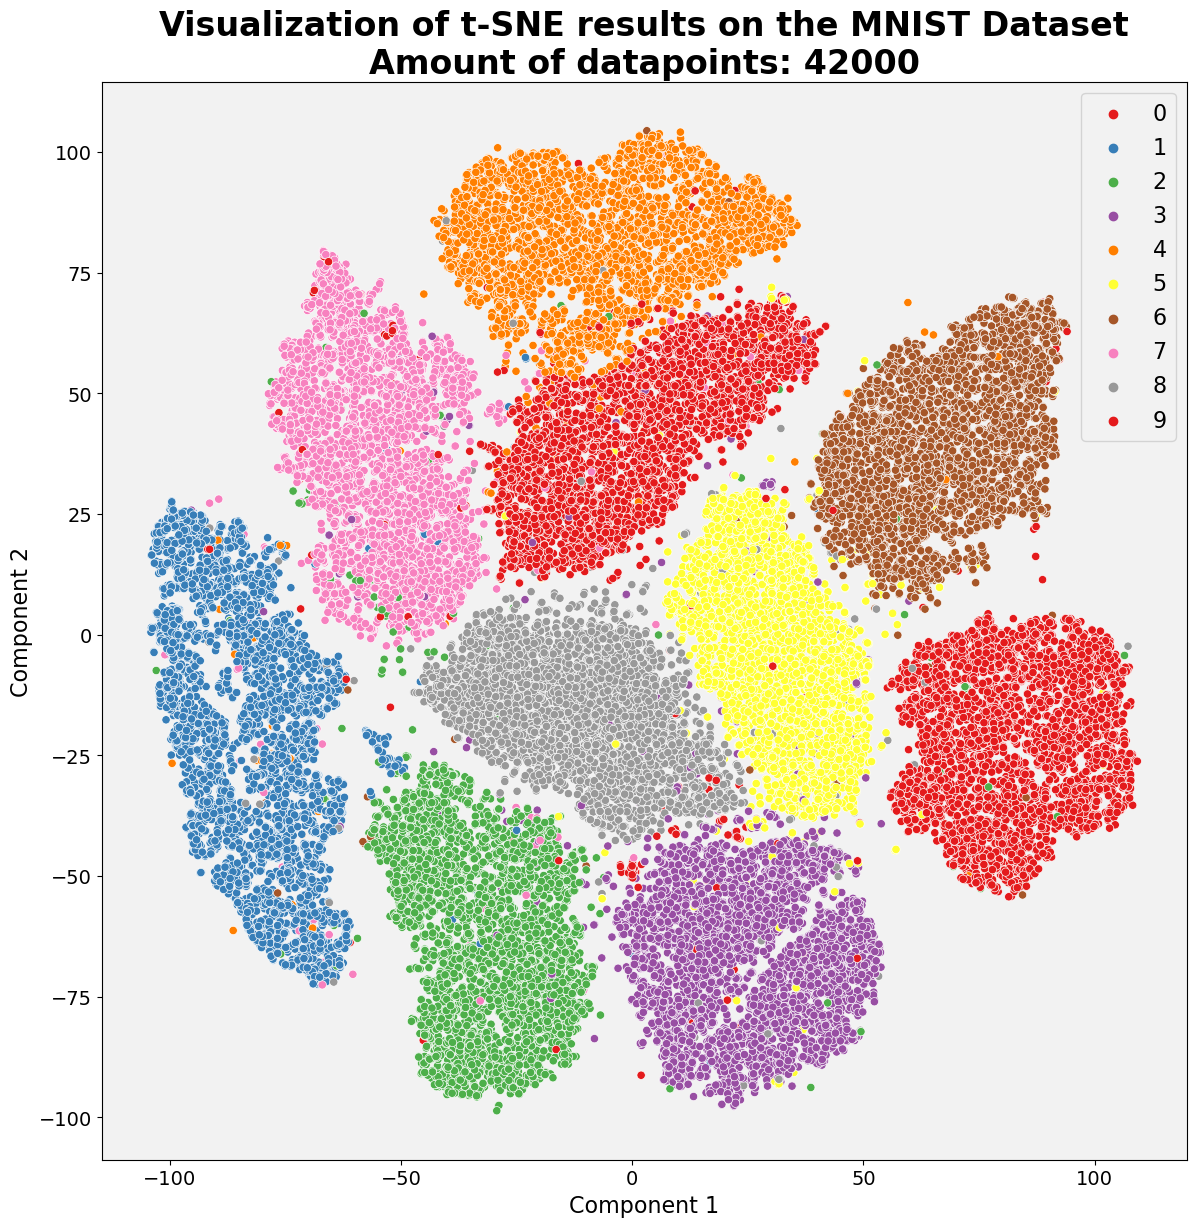

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split up the t-SNE results in training and testing data
tsne_train = pd.DataFrame(transformed[:len(train_df)], columns=['component1', 'component2'])
tsne_test = pd.DataFrame(transformed[len(train_df):], columns=['component1', 'component2'])

# Visualize the results for t-SNE on MNIST
plt.figure(figsize=(14, 14))
plt.title(f"Visualization of t-SNE results on the MNIST Dataset\n\
Amount of datapoints: {len(tsne_train)}", fontsize=24, weight='bold')
sns.scatterplot(x="component1", y="component2",
                data=tsne_train, hue=train_df['label'],
                palette="Set1", legend="full")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Component 1", fontsize=16)
plt.ylabel("Component 2", fontsize=16)
plt.legend(fontsize=16)
plt.show()  # Explicitly show the plot


In [20]:
# Perform another split for t-sne feature validation
X_train, X_val, y_train, y_val = train_test_split(tsne_train,
                                                  train_df['label'],
                                                  test_size=0.25,
                                                  random_state=seed)

# Train model with t-sne features
clf = DecisionTreeClassifier(max_depth=10, random_state=seed)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=1234)

In [21]:
# Evaluate model with t-SNE features and compare to the baseline model
train_preds = clf.predict(X_train)
val_preds = clf.predict(X_val)
acc_tsne_train = acc(train_preds, y_train)
acc_tsne_val = acc(val_preds, y_val)
print(f'Training accuracy with t-SNE features: {acc_tsne_train}%')
print(f'Validation accuracy with t-SNE features: {acc_tsne_val}%')
# Compare t-SNE results with the baseline model
acc_diff = round(acc_tsne_val - acc_baseline_val, 2)
print(f'\nThis is an improvement of {acc_diff}% in validation accuracy over the baseline!')

Training accuracy with t-SNE features: 98.01%
Validation accuracy with t-SNE features: 96.63%

This is an improvement of 12.05% in validation accuracy over the baseline!


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Train baseline KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate the baseline model
train_preds_baseline = knn.predict(X_train)
val_preds_baseline = knn.predict(X_val)
acc_baseline_train = acc(train_preds_baseline, y_train)
acc_baseline_val = acc(val_preds_baseline, y_val)
print(f'Training accuracy for our baseline (using all pixel features): {acc_baseline_train}%')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_baseline_val}%')

Training accuracy for our baseline (using all pixel features): 98.23%
Validation accuracy for our baseline (using all pixel features): 97.36%
